<a href="https://colab.research.google.com/github/LearnCoding199x/learning_AI/blob/master/cat_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:


import tensorflow as tf
import numpy as np
import cv2

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-06-08 15:04:00--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c1c::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   238MB/s    in 0.3s    

2019-06-08 15:04:01 (238 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
list_train_cat = os.listdir(train_cats_dir)
list_train_dog = os.listdir(train_dogs_dir)
train_cat = []
train_dog = []
for i in list_train_cat:
  file_name = os.path.join(train_cats_dir,i)
  data = cv2.imread(file_name)
  data = cv2.resize(data,(150,150))
  data = data/255
  train_cat.append(data)
  
for i in list_train_dog:
  file_name = os.path.join(train_dogs_dir,i)
  data = cv2.imread(file_name)
  data = cv2.resize(data,(150,150))
  data = data/255
  train_dog.append(data)

print(len(train_cat))
print(len(train_dog))

list_validate_cat = os.listdir(validation_cats_dir)
list_validate_dog = os.listdir(validation_dogs_dir)
validate_data = []
for i in list_validate_cat:
  file_name = os.path.join(validation_cats_dir,i)
  data = cv2.imread(file_name)
  data = cv2.resize(data,(150,150))
  data = data/255
  validate_data.append(data)
  
for i in list_validate_dog:
  file_name = os.path.join(validation_dogs_dir,i)
  data = cv2.imread(file_name)
  data = cv2.resize(data,(150,150))
  data = data/255
  validate_data.append(data)

1000
1000


In [0]:
train_cat[0]

array([[[0.08627451, 0.05490196, 0.05490196],
        [0.09411765, 0.0627451 , 0.0627451 ],
        [0.08627451, 0.05490196, 0.05490196],
        ...,
        [0.07058824, 0.02352941, 0.02352941],
        [0.0745098 , 0.02745098, 0.02745098],
        [0.0627451 , 0.01176471, 0.00392157]],

       [[0.08627451, 0.05490196, 0.05490196],
        [0.09411765, 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.03137255, 0.03137255],
        ...,
        [0.10196078, 0.05882353, 0.06666667],
        [0.08235294, 0.03921569, 0.04705882],
        [0.08627451, 0.05098039, 0.04313725]],

       [[0.07843137, 0.04705882, 0.04705882],
        [0.07843137, 0.04705882, 0.04705882],
        [0.05098039, 0.01960784, 0.01960784],
        ...,
        [0.11764706, 0.08235294, 0.09019608],
        [0.11372549, 0.0745098 , 0.08627451],
        [0.08235294, 0.0627451 , 0.06666667]],

       ...,

       [[0.31372549, 0.30588235, 0.32941176],
        [0.28627451, 0.27843137, 0.30196078],
        [0.32156863, 0

In [0]:
train_cat = np.asarray(train_cat)
train_dog = np.asarray(train_dog)
validate_data = np.asarray(validate_data)

In [0]:
train_cat.shape

(1000, 150, 150, 3)

In [0]:
train_image = np.concatenate((train_cat,train_dog),axis=0)
print(train_image.shape)
train_label = np.concatenate((np.zeros((1,1000),dtype='int'),np.full((1,1000),1,dtype='int')),axis=1)
print(train_label.shape)
validate_label = np.concatenate((np.zeros((1,len(list_validate_cat)),dtype='int'),np.full((1,len(list_validate_dog)),1,dtype='int')),axis=1)
print(validate_label.shape)

(2000, 150, 150, 3)
(1, 2000)
(1, 1000)


In [0]:
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras import layers,models

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12425774118006147334
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 18145430237737466003
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 12897353928814655005
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14800692839
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4587454218869816238
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [0]:
class myCNN():
  def __init__(self,train_image,train_label,validation_image,validation_label):
    self.train_image = train_image
    self.train_label = train_label
    self.validation_image = validation_image
    self.validation_label = validation_label
    self.model = Sequential()
    self.model.add(layers.Conv2D(4,(3,3),activation='relu',input_shape=(150,150,3)))
    self.model.add(layers.MaxPooling2D(2))
    self.model.add(layers.Dropout(.5))
    self.model.add(layers.Conv2D(2,(3,3),activation='relu'))
    self.model.add(layers.MaxPooling2D(2))
    self.model.add(layers.Dropout(.5))
    self.model.add(layers.Flatten())
    self.model.add(layers.Dense(16,activation='relu'))
    self.model.add(layers.Dense(1,activation='sigmoid'))
    self.model.summary()
  
  def fit(self):
    self.model.compile(optimizer='sgd',metrics=['acc'],loss='binary_crossentropy')
    history = self.model.fit(self.train_image,self.train_label,epochs=100,validation_data = (self.validation_image,self.validation_label))
    return history
  
  def evaluate(self):
    test_loss, test_acc = self.model.evaluate(self.validation_image, self.validation_label)
    #print(self.model.predict(test_image)[:100])
    return test_loss,test_acc
    

In [0]:
my = myCNN(train_image,train_label.T,validate_data, validate_label.T)
history = my.fit()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 4)       112       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 4)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 74, 74, 4)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 2)         74        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 2)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 36, 36, 2)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2592)              0         
__________

In [0]:
test_loss, test_acc = my.evaluate()
print("LOSS : {} and ACCURACY : {}".format(test_loss,test_acc))


1000/1000 [==============================] - 0s 390us/step
LOSS : 0.6372641725540161 and ACCURACY : 0.653


In [0]:
import matplotlib.pyplot as plt

In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


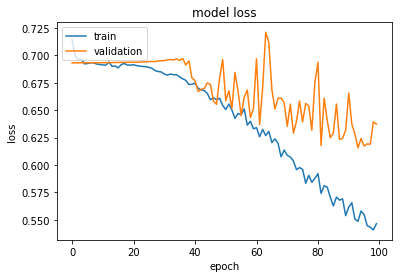

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

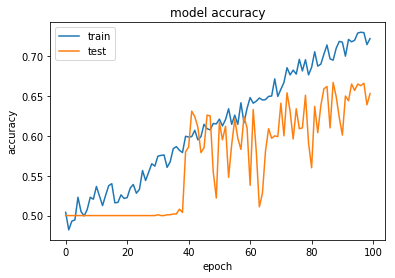

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()